###**IMPORTING REQUIRED PACKAGES**

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
## conda install -c plotly plotly
## conda install -c conda-forge plotly
import plotly.express as px
import plotly.graph_objects as go
#conda install -c conda-forge fbprophet
from fbprophet import Prophet
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

###**DATASET READING AND INFO**

In [4]:
df = pd.read_csv(r'covid_19_clean_complete.csv')
#df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30210 entries, 0 to 30209
Data columns (total 8 columns):
Province/State    9120 non-null object
Country/Region    30210 non-null object
Lat               30210 non-null float64
Long              30210 non-null float64
Date              30210 non-null object
Confirmed         30210 non-null int64
Deaths            30210 non-null int64
Recovered         30210 non-null int64
dtypes: float64(2), int64(3), object(3)
memory usage: 1.8+ MB


###**DATASET PREPROCESSING**

In [5]:
df = pd.read_csv(r'covid_19_clean_complete.csv',parse_dates=['Date'])
#df.info()

In [6]:
df.rename(columns={"Country/Region":"country",'Province/State':'state'},inplace=True)
#df.head()

In [7]:
df['active'] = df['Confirmed'] - df['Deaths'] - df['Recovered']
#df.head(50)

In [8]:
top = df[df['Date'] == df['Date'].max()]
world = top.groupby('country')['Confirmed','active','Deaths'].sum()
#world.head()

world = top.groupby('country')['Confirmed','active','Deaths','Recovered'].sum().reset_index()
world.head()

country  Confirmed  active  Deaths  Recovered
0  Afghanistan       5639    4812     136        691
1      Albania        898     173      31        694
2      Algeria       6442    2755     529       3158
3      Andorra        761     116      49        596
4       Angola         48      32       2         14

###**PLOTTING OVER WORLD MAP**

In [9]:
#CONFIRMED CASES
figure = px.choropleth(world,locations="country",locationmode='country names' 
                       ,color="Confirmed",hover_name="country",range_color=[1,1000],
                      color_continuous_scale="Peach",title="Country with CONFIRMED Cases")
figure.show()

In [10]:
#ACTIVE CASES
figure = px.choropleth(world,locations="country",locationmode='country names' 
                       ,color="active",hover_name="country",range_color=[1,1000],
                      color_continuous_scale="Peach",title="Country with ACTIVE Cases")
figure.show()

In [11]:
#DEATH CASES
figure = px.choropleth(world,locations="country",locationmode='country names' 
                       ,color="Deaths",hover_name="country",range_color=[1,1000],
                      color_continuous_scale="Peach",title="Country with DEATH Cases")
figure.show()

In [12]:
#RECOVERED CASES
figure = px.choropleth(world,locations="country",locationmode='country names' 
                       ,color="Recovered",hover_name="country",range_color=[1,1000],
                      color_continuous_scale="Peach",title="Country with RECOVERED Cases")
figure.show()

###**CASES OVER TIME**

[Text(0, 0.5, 'Total Cases'), Text(0.5, 0, 'Dates')]

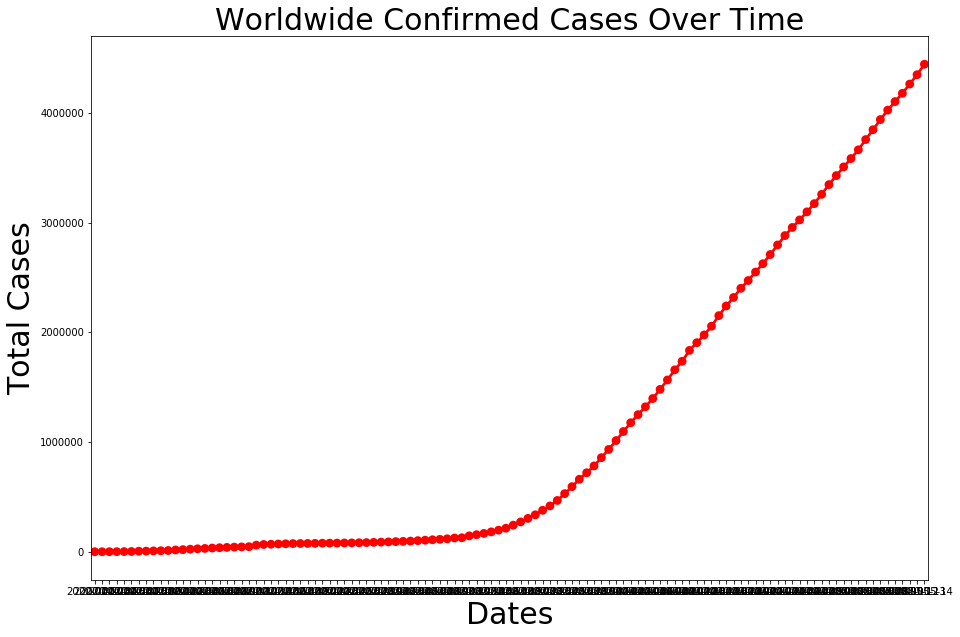

In [13]:
#CONFIRMED CASES
plt.figure(figsize=(15,10))
plt.xlabel("Dates",fontsize=30)
plt.ylabel("Total Cases",fontsize=30)
plt.title("Worldwide Confirmed Cases Over Time",fontsize=30)
total_cases = df.groupby('Date')['Date','Confirmed'].sum().reset_index()
total_cases['Date'] = pd.to_datetime(total_cases['Date'])
a = sns.pointplot(x = total_cases.Date.dt.date,y=total_cases.Confirmed,color='r')
a.set(xlabel="Dates",ylabel="Total Cases")

[Text(0, 0.5, 'Total Cases'), Text(0.5, 0, 'Dates')]

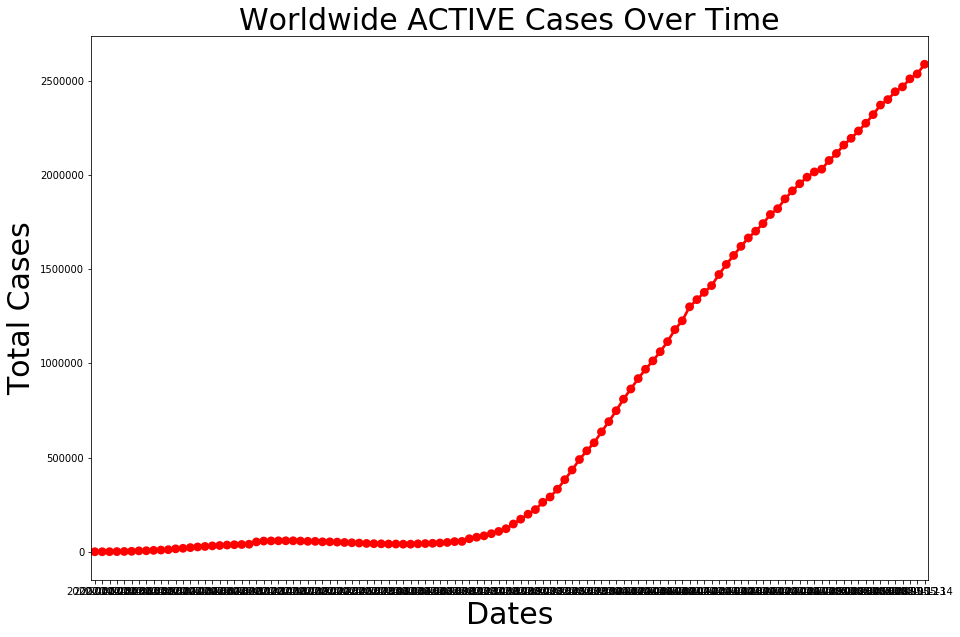

In [14]:
#ACTIVE CASES
plt.figure(figsize=(15,10))
plt.xlabel("Dates",fontsize=30)
plt.ylabel("Total Cases",fontsize=30)
plt.title("Worldwide ACTIVE Cases Over Time",fontsize=30)
total_cases = df.groupby('Date')['Date','active'].sum().reset_index()
total_cases['Date'] = pd.to_datetime(total_cases['Date'])
a = sns.pointplot(x = total_cases.Date.dt.date,y=total_cases.active,color='r')
a.set(xlabel="Dates",ylabel="Total Cases")

[Text(0, 0.5, 'Total Cases'), Text(0.5, 0, 'Dates')]

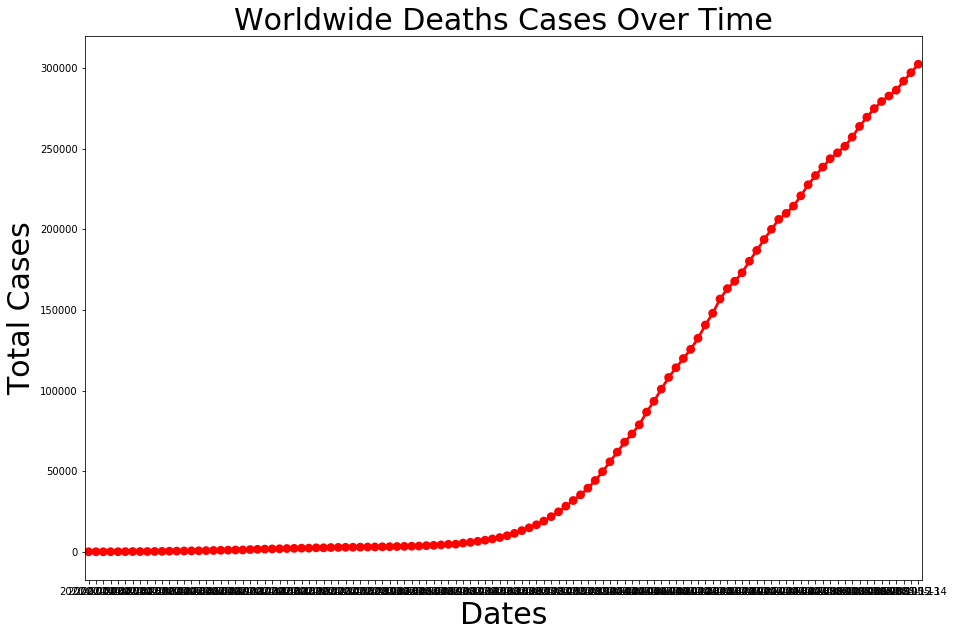

In [15]:
#DEATH CASES
plt.figure(figsize=(15,10))
plt.xlabel("Dates",fontsize=30)
plt.ylabel("Total Cases",fontsize=30)
plt.title("Worldwide Deaths Cases Over Time",fontsize=30)
total_cases = df.groupby('Date')['Date','Deaths'].sum().reset_index()
total_cases['Date'] = pd.to_datetime(total_cases['Date'])
a = sns.pointplot(x = total_cases.Date.dt.date,y=total_cases.Deaths,color='r')
a.set(xlabel="Dates",ylabel="Total Cases")

[Text(0, 0.5, 'Total Cases'), Text(0.5, 0, 'Dates')]

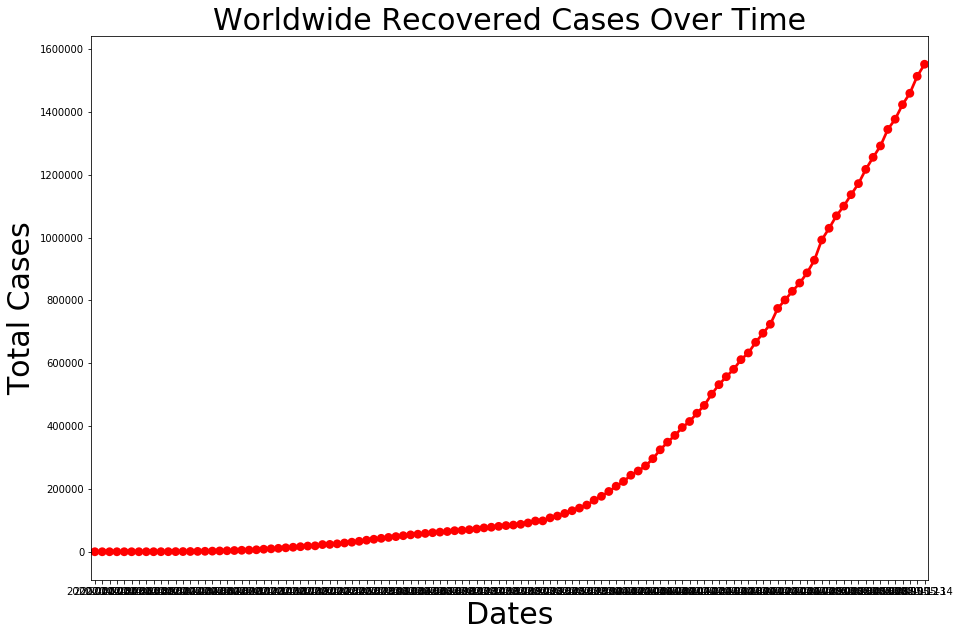

In [16]:
#RECOVERED CASES
plt.figure(figsize=(15,10))
plt.xlabel("Dates",fontsize=30)
plt.ylabel("Total Cases",fontsize=30)
plt.title("Worldwide Recovered Cases Over Time",fontsize=30)
total_cases = df.groupby('Date')['Date','Recovered'].sum().reset_index()
total_cases['Date'] = pd.to_datetime(total_cases['Date'])
a = sns.pointplot(x = total_cases.Date.dt.date,y=total_cases.Recovered,color='r')
a.set(xlabel="Dates",ylabel="Total Cases")

###**TOP 20 COUNTRIES**

In [17]:
#CONFIRMED
top_confirm = top.groupby(by='country')['Confirmed'].sum()
top_confirm.head()

country
Afghanistan    5639
Albania         898
Algeria        6442
Andorra         761
Angola           48
Name: Confirmed, dtype: int64

[Text(0, 0.5, 'Country'), Text(0.5, 0, 'Total Cases')]

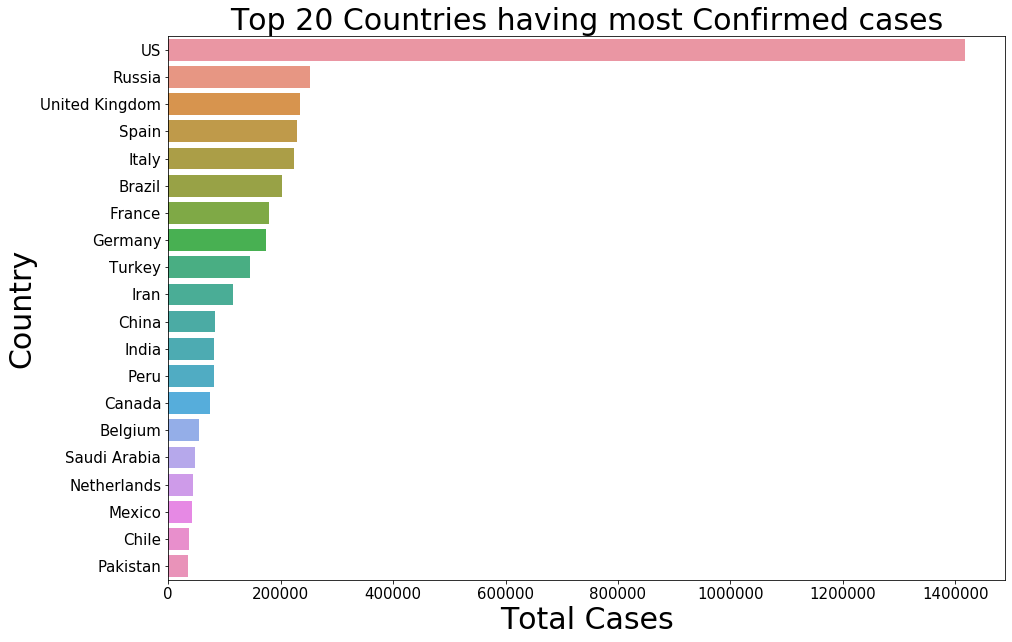

In [18]:
top_confirm= top.groupby(by='country')['Confirmed'].sum().sort_values(ascending=False).reset_index().head(20)

plt.figure(figsize=(15,10))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Total Cases",fontsize=30)
plt.ylabel("Country",fontsize=30)
plt.title("Top 20 Countries having most Confirmed cases",fontsize=30)
ax = sns.barplot(x=top_confirm.Confirmed,y=top_confirm.country)
ax.set(xlabel="Total Cases",ylabel="Country")

In [19]:
#ACTIVE
top_actives = top.groupby(by='country')['active'].sum()
top_actives.head()

country
Afghanistan    4812
Albania         173
Algeria        2755
Andorra         116
Angola           32
Name: active, dtype: int64

[Text(0, 0.5, 'Country'), Text(0.5, 0, 'Total Cases')]

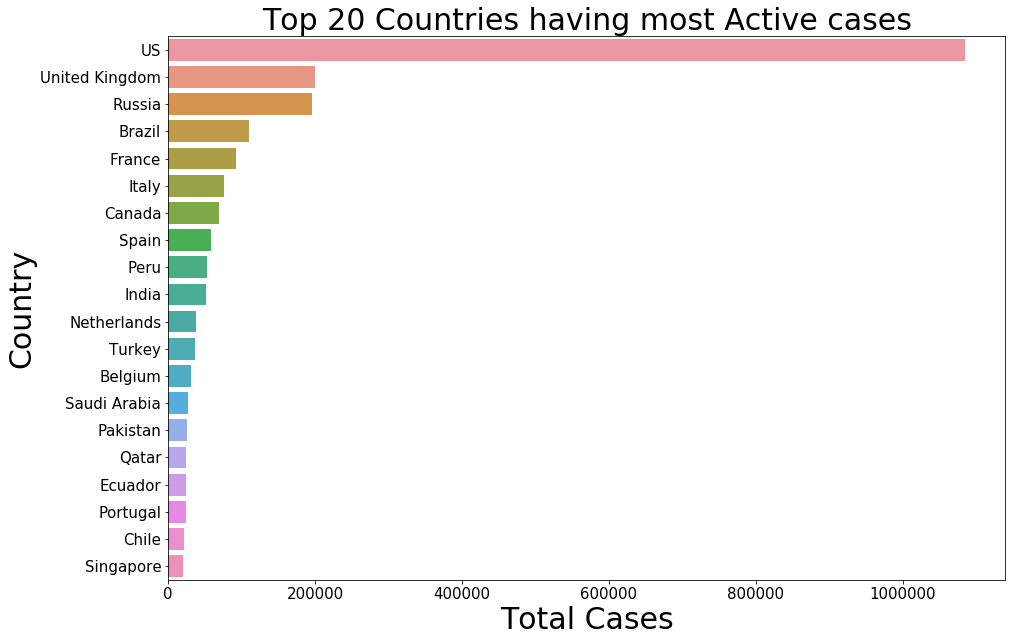

In [20]:
top_actives= top.groupby(by='country')['active'].sum().sort_values(ascending=False).reset_index().head(20)

plt.figure(figsize=(15,10))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Total Cases",fontsize=30)
plt.ylabel("Country",fontsize=30)
plt.title("Top 20 Countries having most Active cases",fontsize=30)
ax = sns.barplot(x=top_actives.active,y=top_actives.country)
ax.set(xlabel="Total Cases",ylabel="Country")

In [21]:
#DEATHS
top_death= top.groupby(by='country')['Deaths'].sum()
top_death.head()

country
Afghanistan    136
Albania         31
Algeria        529
Andorra         49
Angola           2
Name: Deaths, dtype: int64

[Text(0, 0.5, 'Country'), Text(0.5, 0, 'Total Cases')]

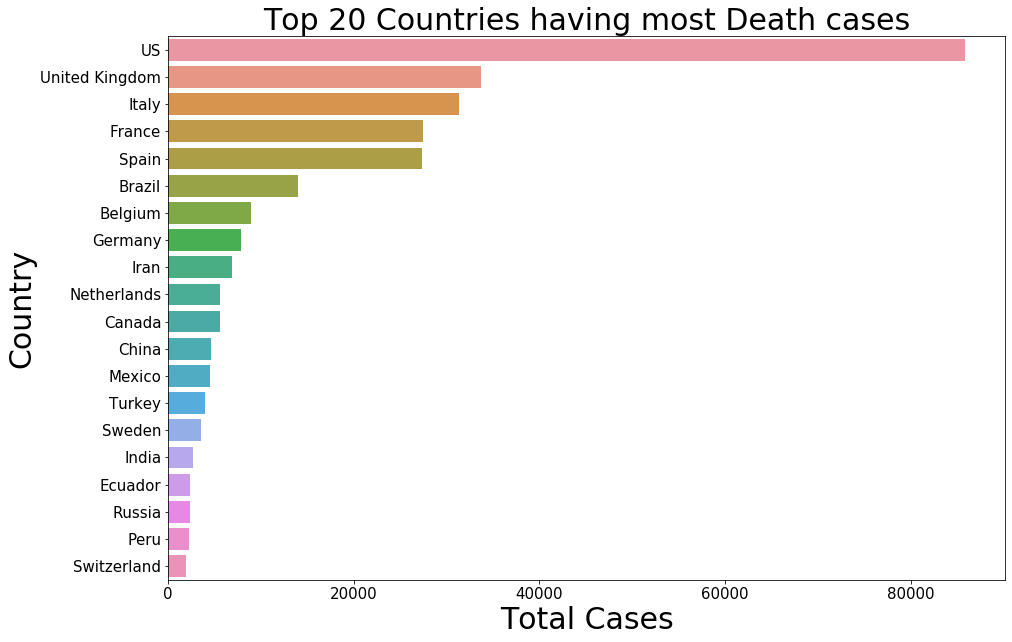

In [22]:
top_death= top.groupby(by='country')['Deaths'].sum().sort_values(ascending=False).reset_index().head(20)

plt.figure(figsize=(15,10))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Total Cases",fontsize=30)
plt.ylabel("Country",fontsize=30)
plt.title("Top 20 Countries having most Death cases",fontsize=30)
ax = sns.barplot(x=top_death.Deaths,y=top_death.country)
ax.set(xlabel="Total Cases",ylabel="Country")

In [23]:
#RECOVERED
top_recover= top.groupby(by='country')['Recovered'].sum()
top_recover.head()

country
Afghanistan     691
Albania         694
Algeria        3158
Andorra         596
Angola           14
Name: Recovered, dtype: int64

[Text(0, 0.5, 'Country'), Text(0.5, 0, 'Total Cases')]

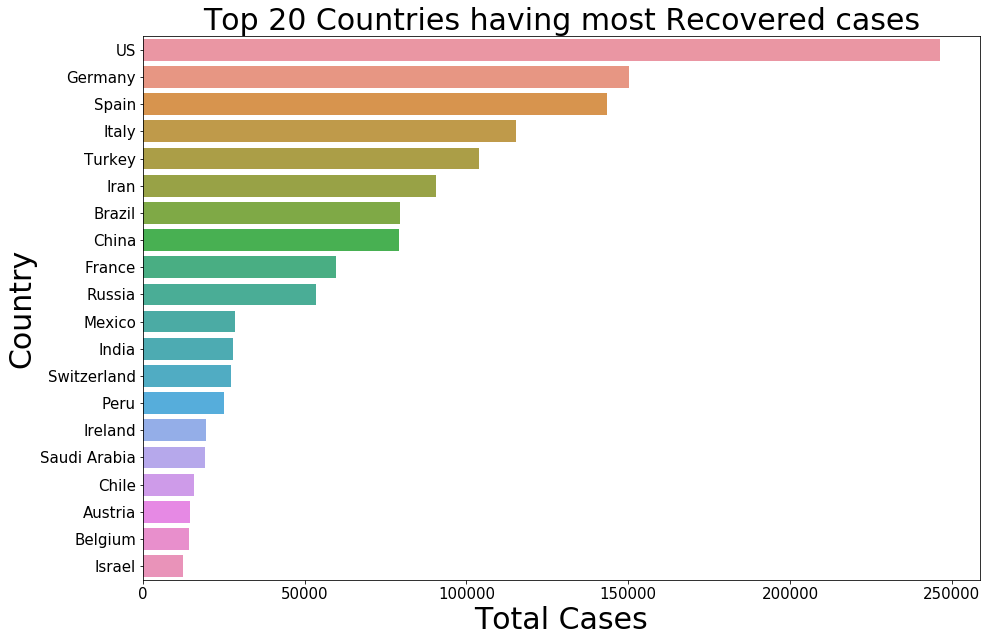

In [24]:
top_recover= top.groupby(by='country')['Recovered'].sum().sort_values(ascending=False).reset_index().head(20)

plt.figure(figsize=(15,10))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Total Cases",fontsize=30)
plt.ylabel("Country",fontsize=30)
plt.title("Top 20 Countries having most Recovered cases",fontsize=30)
ax = sns.barplot(x=top_recover.Recovered,y=top_recover.country)
ax.set(xlabel="Total Cases",ylabel="Country")

###**ANALYSIS ON SOME COUNTRIES**

In [25]:
#CHINA US ITALY INDIA

china = df[df.country == 'China']
#china.head()
china = china.groupby(by='Date')['Recovered','active','Confirmed','Deaths'].sum().reset_index()
#china.head(10)

us = df[df.country == 'US']
us = us.groupby(by='Date')['Recovered','active','Confirmed','Deaths'].sum().reset_index()
#us.head(10)

italy = df[df.country == 'Italy']
italy = italy.groupby(by='Date')['Recovered','active','Confirmed','Deaths'].sum().reset_index()
#italy.head(10)

india = df[df.country == 'India']
india = india.groupby(by='Date')['Recovered','active','Confirmed','Deaths'].sum().reset_index()
#india.head(10)

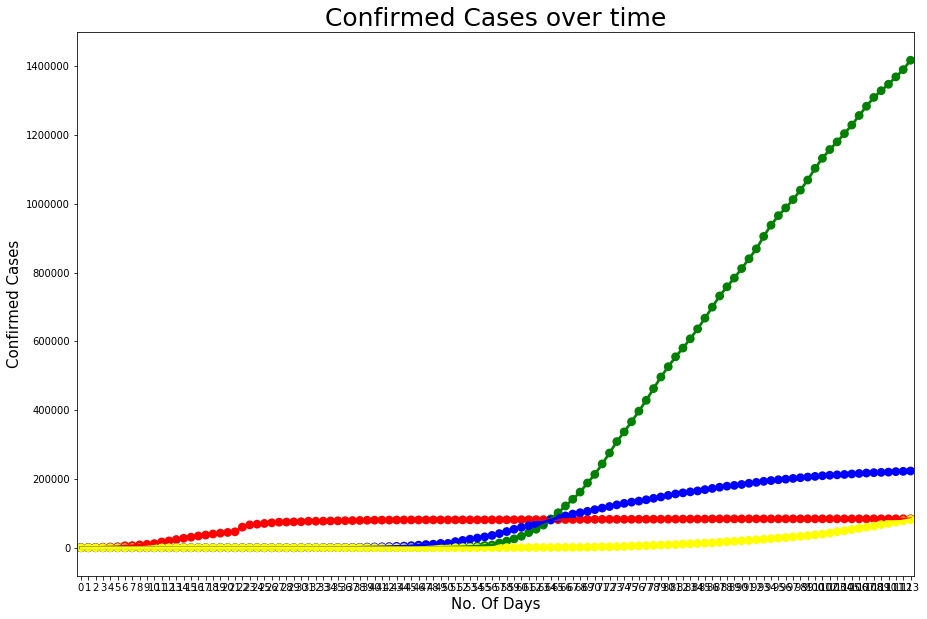

In [26]:
plt.figure(figsize=(15,10))
sns.pointplot(china.index,china.Confirmed,color="Red")
sns.pointplot(us.index,us.Confirmed,color="Green")
sns.pointplot(italy.index,italy.Confirmed,color="Blue")
sns.pointplot(india.index,india.Confirmed,color="Yellow")
plt.title("Confirmed Cases over time", fontsize=25)
plt.ylabel("Confirmed Cases",fontsize=15)
plt.xlabel("No. Of Days",fontsize=15)
plt.show()

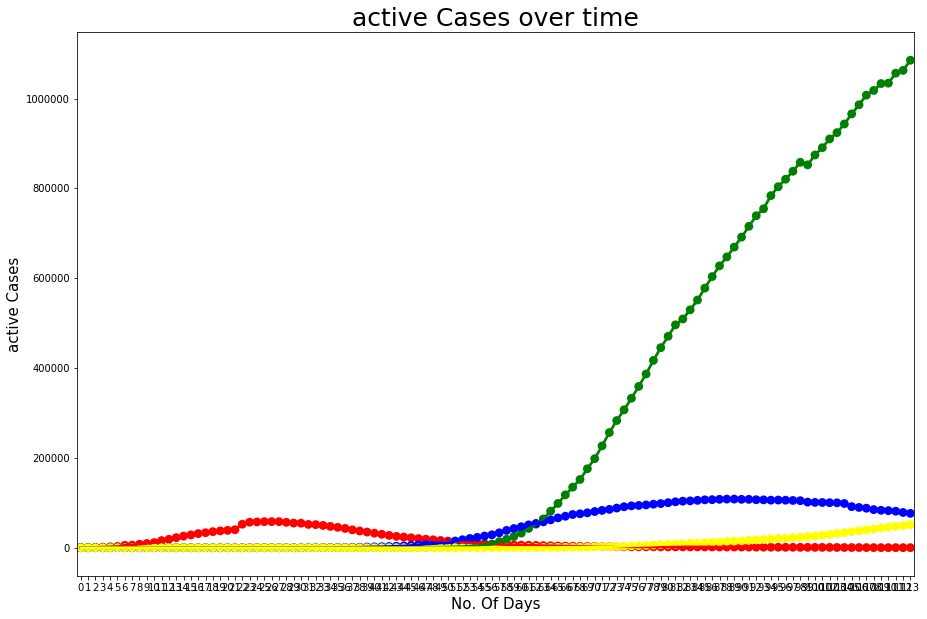

In [27]:
plt.figure(figsize=(15,10))
sns.pointplot(china.index,china.active,color="Red")
sns.pointplot(us.index,us.active,color="Green")
sns.pointplot(italy.index,italy.active,color="Blue")
sns.pointplot(india.index,india.active,color="Yellow")
plt.title("active Cases over time", fontsize=25)
plt.ylabel("active Cases",fontsize=15)
plt.xlabel("No. Of Days",fontsize=15)
plt.show()

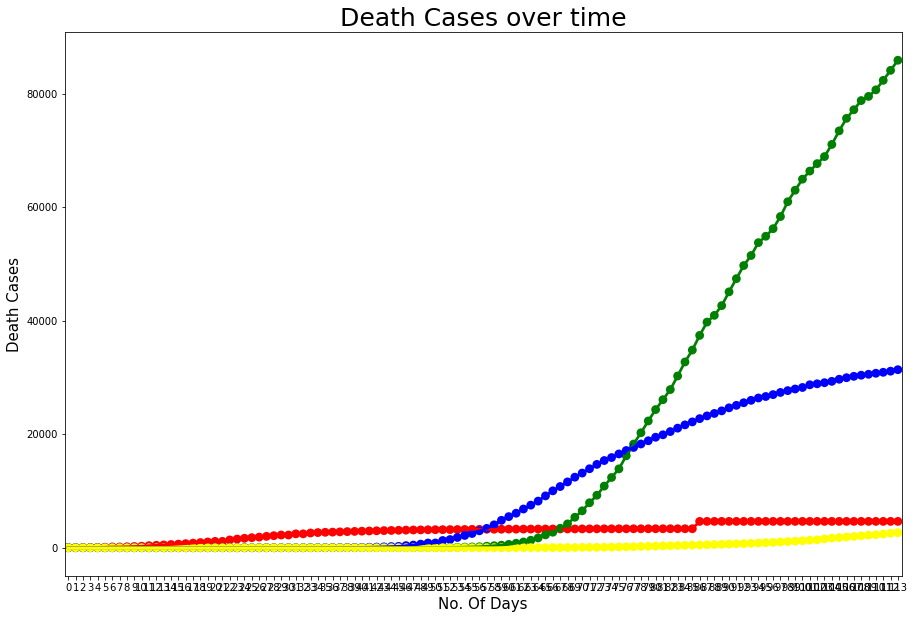

In [28]:
plt.figure(figsize=(15,10))
sns.pointplot(china.index,china.Deaths,color="Red")
sns.pointplot(us.index,us.Deaths,color="Green")
sns.pointplot(italy.index,italy.Deaths,color="Blue")
sns.pointplot(india.index,india.Deaths,color="Yellow")
plt.title("Death Cases over time", fontsize=25)
plt.ylabel("Death Cases",fontsize=15)
plt.xlabel("No. Of Days",fontsize=15)
plt.show()

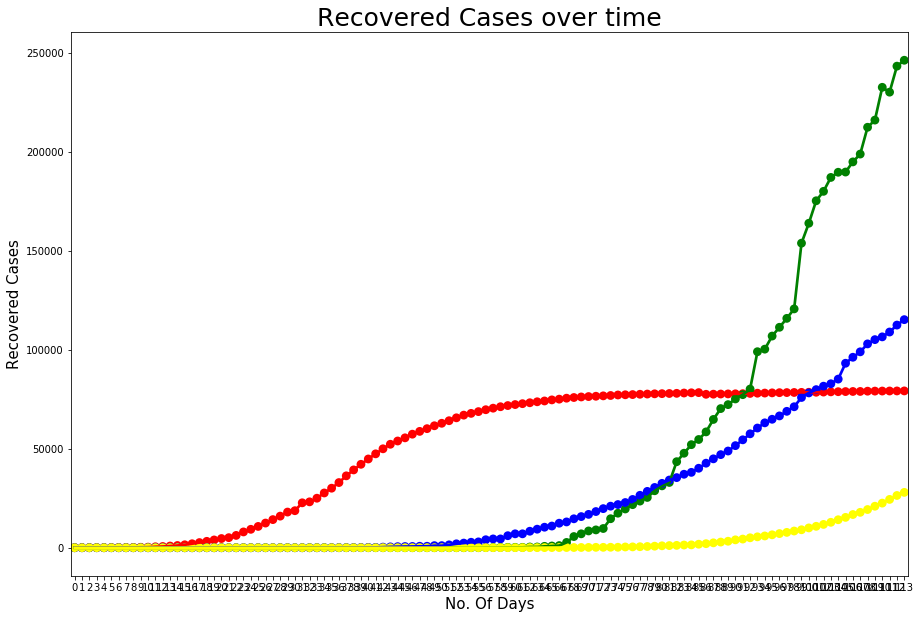

In [29]:
plt.figure(figsize=(15,10))
sns.pointplot(china.index,china.Recovered,color="Red")
sns.pointplot(us.index,us.Recovered,color="Green")
sns.pointplot(italy.index,italy.Recovered,color="Blue")
sns.pointplot(india.index,india.Recovered,color="Yellow")
plt.title("Recovered Cases over time", fontsize=25)
plt.ylabel("Recovered Cases",fontsize=15)
plt.xlabel("No. Of Days",fontsize=15)
plt.show()

###**PREDICTION AND FORCASTING (WORLD)**

In [78]:
confirmed = df.groupby('Date').sum()['Confirmed'].reset_index()
deaths = df.groupby('Date').sum()['Deaths'].reset_index()
recovered = df.groupby('Date').sum()['Recovered'].reset_index()
active = df.groupby('Date').sum()['active'].reset_index()

CONFIRMED

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


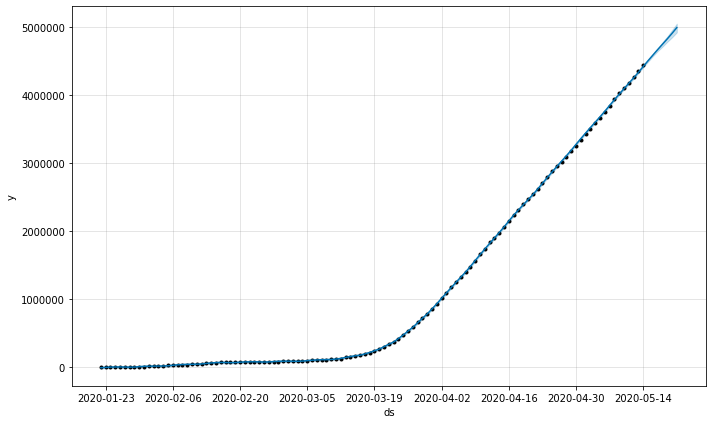

In [79]:
#renaming columns 
# prophet need two columns for prediction (ds-date,y-that we want to predict)
confirmed.columns = ['ds','y']
confirmed['ds'] = pd.to_datetime(confirmed['ds'])  ## convert to datetime
m = Prophet(interval_width=0.95)   ## making a model of prophet with accuracy 95$
m.fit(confirmed)                  ## applyying data to model
future = m.make_future_dataframe(periods=7)  ## making furure prediction for next 7 days
#future.tail()                 # print last 5 days

forecast = m.predict(future)

forecast.head()  ## data of prediction
metric_df=forecast.set_index('ds')[['yhat']].join(confirmed.set_index('ds').y).reset_index()

# ds - date
# yhat - prediction made
# yhat_lower - lower limit of prediction
# yhoat_upper - upper limit of prediction

metric_df.dropna(inplace=True)
#print(metric_df)


confirmed_forecast_plot = m.plot(forecast)  # ploting predicted value of confirmed cases
# black dot - actual values
# blue line = predicted values

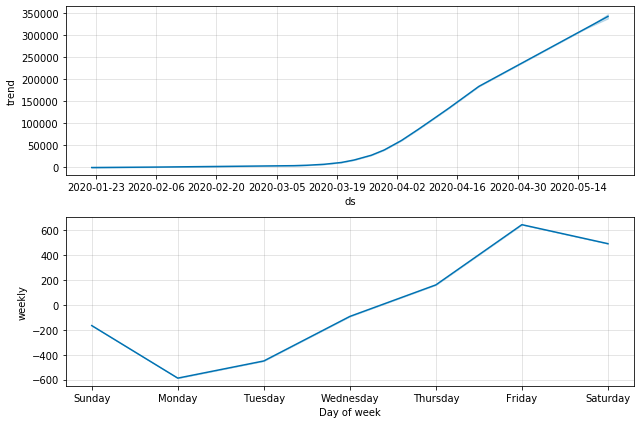

In [40]:
confirmed_forecast_plot = m.plot_components(forecast)

In [80]:
#R-Score
r2_score(metric_df.y, metric_df.yhat)

0.9999772750477183

In [81]:
#MEAN SQUARE
mean_squared_error(metric_df.y, metric_df.yhat)

43988753.26062069

In [82]:
#MEAN ABSOLUTE
mean_absolute_error(metric_df.y, metric_df.yhat)

4776.939775171555

ACTIVE

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


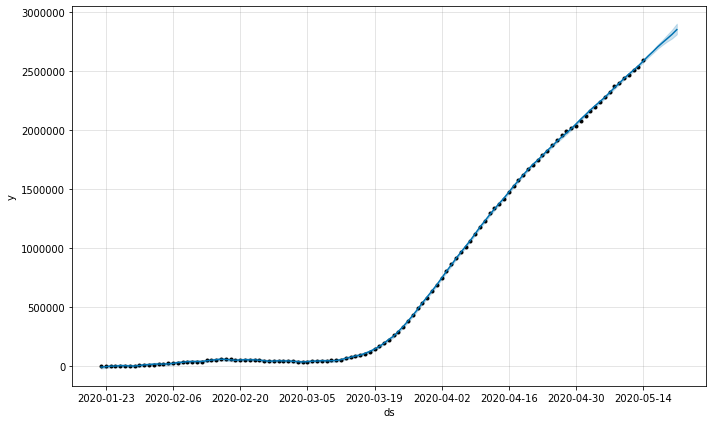

In [83]:
#renaming columns 
# prophet need two columns for prediction (ds-date,y-that we want to predict)
active.columns = ['ds','y']
active['ds'] = pd.to_datetime(active['ds'])  ## convert to datetime
m = Prophet(interval_width=0.95)   ## making a model of prophet with accuracy 95$
m.fit(active)                  ## applyying data to model
future = m.make_future_dataframe(periods=7)  ## making furure prediction for next 7 days
#future.tail()                 # print last 5 days

forecast = m.predict(future)

forecast.head()  ## data of prediction
metric_df=forecast.set_index('ds')[['yhat']].join(active.set_index('ds').y).reset_index()

# ds - date
# yhat - prediction made
# yhat_lower - lower limit of prediction
# yhoat_upper - upper limit of prediction

metric_df.dropna(inplace=True)
#print(metric_df)

active_forecast_plot = m.plot(forecast)  # ploting predicted value of confirmed cases
# black dot - actual values
# blue line = predicted values

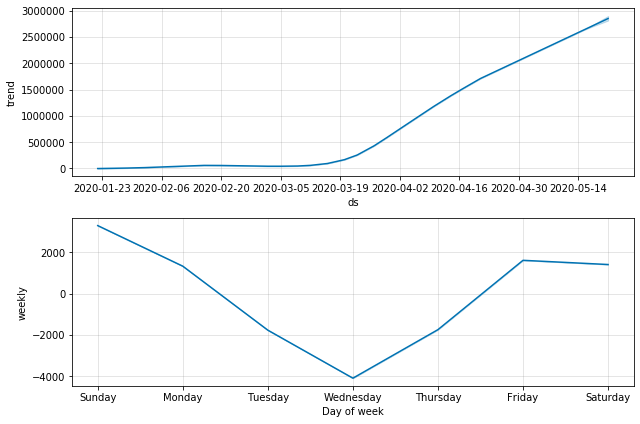

In [84]:
active_forecast_plot = m.plot_components(forecast)

In [85]:
#R-Score
r2_score(metric_df.y, metric_df.yhat)

0.999955817645072

In [86]:
#MEAN SQUARE
mean_squared_error(metric_df.y, metric_df.yhat)

32950433.474696837

In [87]:
#MEAN ABSOLUTE
mean_absolute_error(metric_df.y, metric_df.yhat)

4229.980832226832

RECOVERED

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


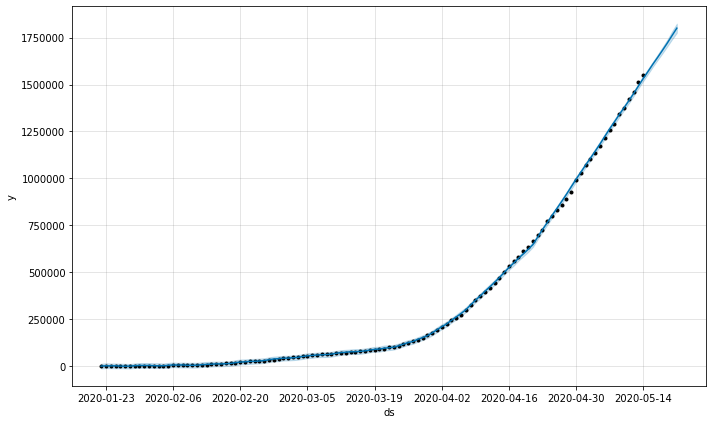

In [88]:
#renaming columns 
# prophet need two columns for prediction (ds-date,y-that we want to predict)
recovered.columns = ['ds','y']
recovered['ds'] = pd.to_datetime(recovered['ds'])  ## convert to datetime
m = Prophet(interval_width=0.95)   ## making a model of prophet with accuracy 95$
m.fit(recovered)                  ## applyying data to model
future = m.make_future_dataframe(periods=7)  ## making furure prediction for next 7 days
#future.tail()                 # print last 5 days

forecast = m.predict(future)

forecast.head()  ## data of prediction
metric_df=forecast.set_index('ds')[['yhat']].join(recovered.set_index('ds').y).reset_index()

# ds - date
# yhat - prediction made
# yhat_lower - lower limit of prediction
# yhoat_upper - upper limit of prediction

metric_df.dropna(inplace=True)
#print(metric_df)

recovered_forecast_plot = m.plot(forecast)  # ploting predicted value of confirmed cases
# black dot - actual values
# blue line = predicted values

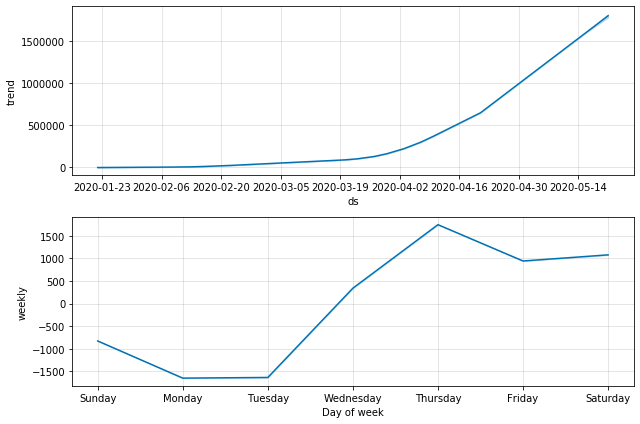

In [89]:
recovered_forecast_plot = m.plot_components(forecast)

In [90]:
#R-Score
r2_score(metric_df.y, metric_df.yhat)

0.9997722347863156

In [91]:
#MEAN SQUARE
mean_squared_error(metric_df.y, metric_df.yhat)

43611232.23497777

In [92]:
#MEAN ABSOLUTE
mean_absolute_error(metric_df.y, metric_df.yhat)

3814.2269851803526

DEATHS

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


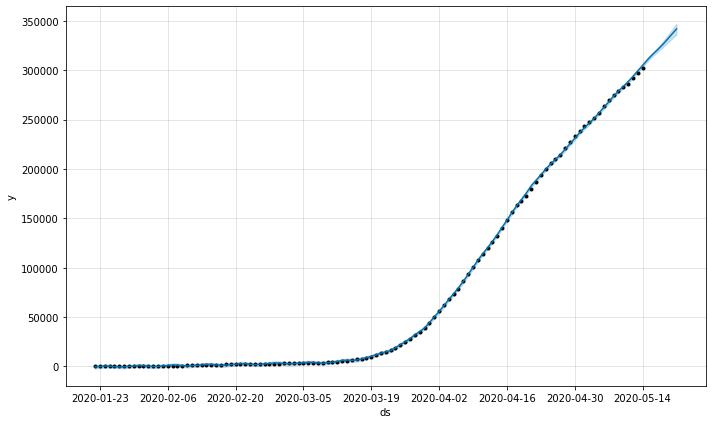

In [93]:
#renaming columns 
# prophet need two columns for prediction (ds-date,y-that we want to predict)
deaths.columns = ['ds','y']
deaths['ds'] = pd.to_datetime(deaths['ds'])  ## convert to datetime
m = Prophet(interval_width=0.95)   ## making a model of prophet with accuracy 95$
m.fit(deaths)                  ## applyying data to model
future = m.make_future_dataframe(periods=7)  ## making furure prediction for next 7 days
#future.tail()                 # print last 5 days

forecast = m.predict(future)

forecast.head()  ## data of prediction
metric_df=forecast.set_index('ds')[['yhat']].join(deaths.set_index('ds').y).reset_index()

# ds - date
# yhat - prediction made
# yhat_lower - lower limit of prediction
# yhoat_upper - upper limit of prediction

metric_df.dropna(inplace=True)
#print(metric_df)

deaths_forecast_plot = m.plot(forecast)  # ploting predicted value of confirmed cases
# black dot - actual values
# blue line = predicted values

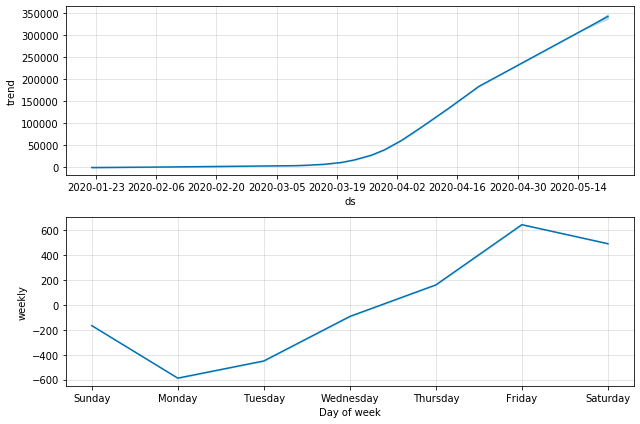

In [94]:
deaths_forecast_plot = m.plot_components(forecast)

In [95]:
#R-Score
r2_score(metric_df.y, metric_df.yhat)

0.999925570048949

In [96]:
#MEAN SQUARE
mean_squared_error(metric_df.y, metric_df.yhat)

724820.3995915962

In [97]:
#MEAN ABSOLUTE
mean_absolute_error(metric_df.y, metric_df.yhat)

603.0377561268665

###**PREDICTION AND FORCASTING (INDIA)**

In [39]:
df_india = df.query('country=="India"')
#df_india.head()
df_india = df.query('country=="India"').groupby('Date')[['Confirmed','Deaths','Recovered','active']].sum().reset_index()
india_confirmed,india_deaths,india_recovered,india_active = df_india[['Date','Confirmed']],df_india[['Date','Deaths']],df_india[['Date','Recovered']],df_india[['Date','active']]

CONFIRMED 

C:\Users\Ashutosh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


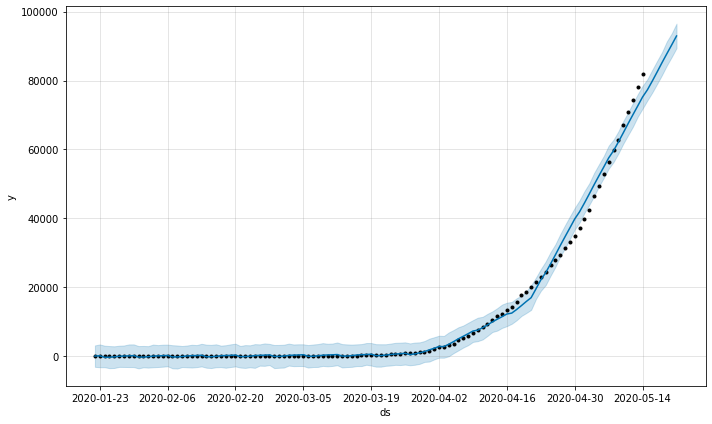

In [58]:
india_confirmed.columns = ['ds','y']
india_confirmed['ds'] = pd.to_datetime(india_confirmed['ds']) 
#india_confirmed.head()

m = Prophet(interval_width=0.95)   ## making a model of prophet with accuracy 95$
m.fit(india_confirmed)                  ## applyying data to model
future = m.make_future_dataframe(periods=7)  ## making furure prediction for next 7 days
future.tail()                 # print last 5 days

forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

metric_df=forecast.set_index('ds')[['yhat']].join(india_confirmed.set_index('ds').y).reset_index()

# ds - date
# yhat - prediction made
# yhat_lower - lower limit of prediction
# yhoat_upper - upper limit of prediction
metric_df.dropna(inplace=True)
#print(metric_df)

india_confirmed_forecast_plot = m.plot(forecast)  # ploting predicted value of confirmed cases

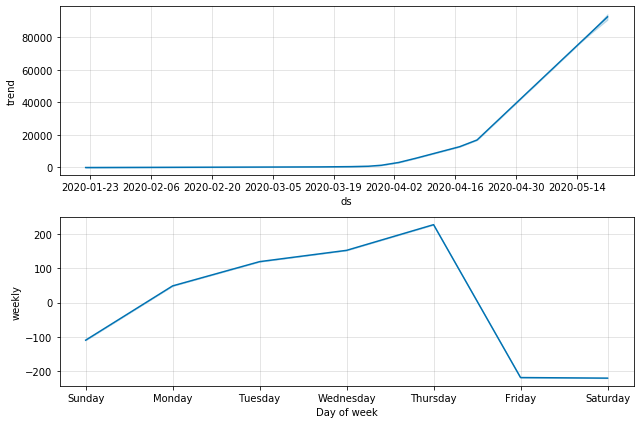

In [59]:
india_confirmed_forecast_plot = m.plot_components(forecast)

In [60]:
#R-Score
r2_score(metric_df.y, metric_df.yhat)

0.993311900403622

In [61]:
#MEAN SQUARE
mean_squared_error(metric_df.y, metric_df.yhat)

2704197.579317428

In [62]:
#MEAN ABSOLUTE
mean_absolute_error(metric_df.y, metric_df.yhat)

861.7053695219906

ACTIVE

C:\Users\Ashutosh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


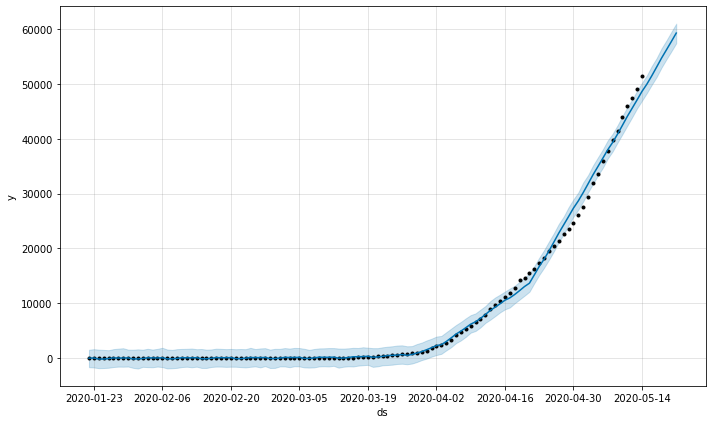

In [63]:
india_active.columns = ['ds','y']
india_active['ds'] = pd.to_datetime(india_active['ds']) 

#india_active.head()

m = Prophet(interval_width=0.95)   ## making a model of prophet with accuracy 95$
m.fit(india_active)                  ## applyying data to model
future = m.make_future_dataframe(periods=7)  ## making furure prediction for next 7 days
future.tail()                 # print last 5 days

forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()
metric_df=forecast.set_index('ds')[['yhat']].join(india_active.set_index('ds').y).reset_index()

# ds - date
# yhat - prediction made
# yhat_lower - lower limit of prediction
# yhoat_upper - upper limit of prediction
metric_df.dropna(inplace=True)
#print(metric_df)

india_active_forecast_plot = m.plot(forecast)  # ploting predicted value of active cases

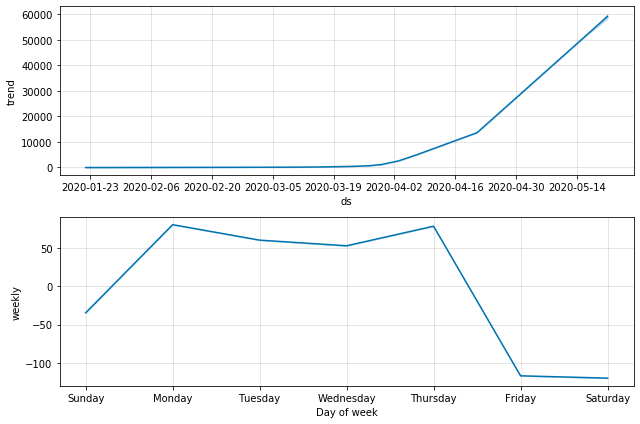

In [64]:
india_active_forecast_plot = m.plot_components(forecast)

In [65]:
#R-Score
r2_score(metric_df.y, metric_df.yhat)

0.9960804198909399

In [66]:
#MEAN SQUARE
mean_squared_error(metric_df.y, metric_df.yhat)

695454.5901662812

In [67]:
#MEAN ABSOLUTE
mean_absolute_error(metric_df.y, metric_df.yhat)

442.7155239532528

RECOVERED

C:\Users\Ashutosh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


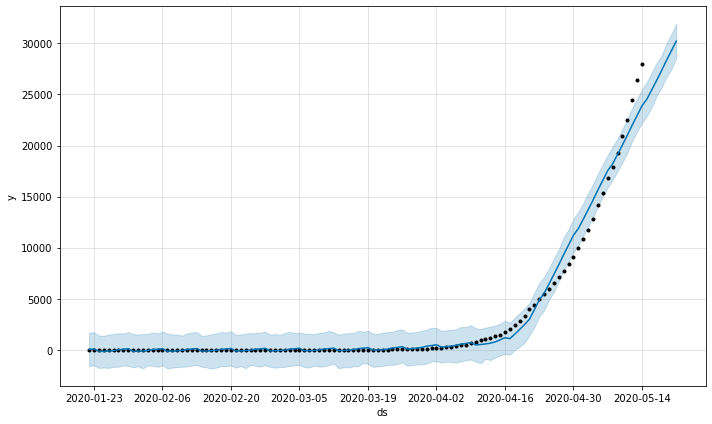

In [68]:
india_recovered.columns = ['ds','y']
india_recovered['ds'] = pd.to_datetime(india_recovered['ds']) 
#india_recovered.head()

m = Prophet(interval_width=0.95)   ## making a model of prophet with accuracy 95$
m.fit(india_recovered)                  ## applyying data to model
future = m.make_future_dataframe(periods=7)  ## making furure prediction for next 7 days
future.tail()                 # print last 5 days

forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

metric_df=forecast.set_index('ds')[['yhat']].join(india_recovered.set_index('ds').y).reset_index()

# ds - date
# yhat - prediction made
# yhat_lower - lower limit of prediction
# yhoat_upper - upper limit of prediction
metric_df.dropna(inplace=True)
#print(metric_df)

india_recover_forecast_plot = m.plot(forecast)  # ploting predicted value of recover cases

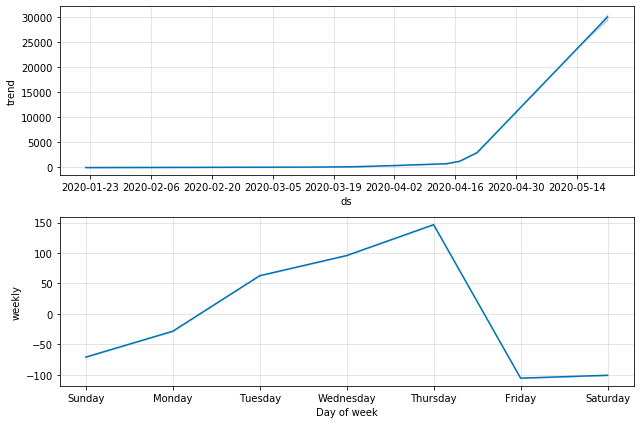

In [69]:
india_recover_forecast_plot = m.plot_components(forecast)

In [70]:
#R-Score
r2_score(metric_df.y, metric_df.yhat)

0.9826537818355147

In [71]:
#MEAN SQUARE
mean_squared_error(metric_df.y, metric_df.yhat)

673471.1660193523

In [72]:
#MEAN ABSOLUTE
mean_absolute_error(metric_df.y, metric_df.yhat)

425.5148015583853

DEATHS

C:\Users\Ashutosh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


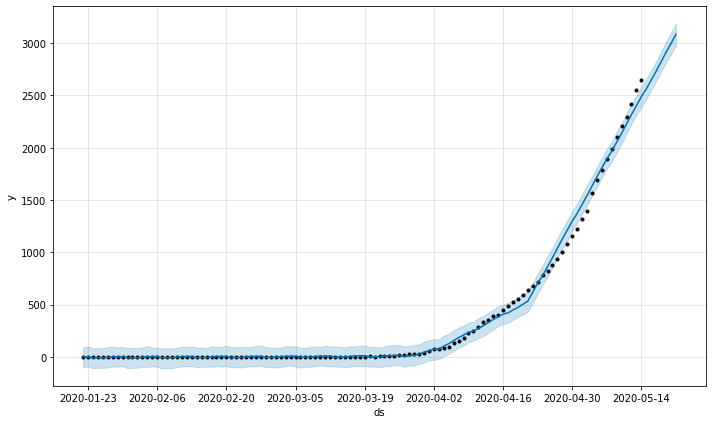

In [73]:
india_deaths.columns = ['ds','y']
india_deaths['ds'] = pd.to_datetime(india_deaths['ds']) 
#india_deaths.head()

m = Prophet(interval_width=0.95)   ## making a model of prophet with accuracy 95$
m.fit(india_deaths)                  ## applyying data to model
future = m.make_future_dataframe(periods=7)  ## making furure prediction for next 7 days
future.tail()                 # print last 5 days

forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

metric_df=forecast.set_index('ds')[['yhat']].join(india_deaths.set_index('ds').y).reset_index()

# ds - date
# yhat - prediction made
# yhat_lower - lower limit of prediction
# yhoat_upper - upper limit of prediction
metric_df.dropna(inplace=True)
#print(metric_df)

india_deaths_forecast_plot = m.plot(forecast)  # ploting predicted value of death cases

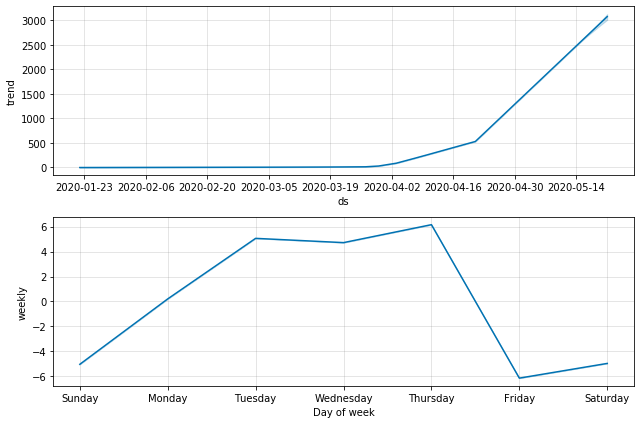

In [74]:
india_deaths_forecast_plot = m.plot_components(forecast)

In [75]:
#R-Score
r2_score(metric_df.y, metric_df.yhat)

0.994769823876583

In [76]:
#MEAN SQUARE
mean_squared_error(metric_df.y, metric_df.yhat)

2291.2709680931116

In [77]:
#MEAN ABSOLUTE
mean_absolute_error(metric_df.y, metric_df.yhat)

26.071559835315867